# Simultaneous Localization and Mapping
Simultaneous Localization and Mapping (SLAM) is a fundamental problem in robotics and autonomous systems, where the objective is to concurrently build a map of the environment and estimate the position and orientation of the robot or sensor platform. SLAM plays a crucial role in various applications, including search and rescue, home automation, and industrial automation.

## Objectives
- Understanding SLAM as:
  - Dynamic Bayes Network
  - Factor Graphs
  - Least squares
- Maximum a-Posteriori (MAP) solution.
- Enabling you to read papers and understand literature based on these ideas.

## Notation and Weighted Norm
We define $\|r\|_{\Sigma}^{2}:=r^{\top} \Sigma^{-1} r$. $\Sigma$ (covariance) is symmetric and PSD. $\Sigma=L L^{\top}, L$ is the lower triangular Cholesky factor of $\Sigma$.

$$
\Sigma^{-1}=\left(L L^{\top}\right)^{-1}=L^{-\top} L^{-1} \text {. }
$$

**Remark:** $(A B)^{-1}=B^{-1} A^{-1}$ and $A^{-\top}=\left(A^{\top}\right)^{-1}=\left(A^{-1}\right)^{\top}$.

We can convert the weighted norm to the Euclidean norm as follows.
\begin{align}
\|r\|_{L}^{2}=r^{\top} \Sigma^{-1} r=r^{\top} L^{-\top} L^{-1} r & =\left(L^{-1} r\right)^{\top}\left(L^{-1} r\right) =\left\|L^{-1} r\right\|^{2} ,
\end{align}
where the Euclidean norm is given by $$\|x\|=\sqrt{x_{1}^{2}+x_{2}^{2}+\cdots+x_{n}^{2}}, \quad x \in \mathbb{R}^{n}.$$


## Dynamic Bayes Network

$$
\begin{aligned}
& x=x_{0: k}=\left\{x_{0}, x_{1}, \ldots, x_{k}\right\} \quad \text{State variables}\\
& z=z_{1: k}=\left\{z_{1}, z_{2}, \ldots, z_{k}\right\}  \quad\ \text{Measurements} \\
& p(x, z)=p\left(x_{0: k}, z_{1: k-1}, z_{k}\right)  \quad \text{Joint distribution}\\
& =p(z_{k} \mid \underbrace{x_{0: k}, z_{1: k-1}}_{\text {Markov assumption }}) p\left(x_{0: k}, z_{1: k-1}\right) \\
& =p\left(z_{k} \mid x_{k}\right) p\left(x_{0: k-1}, x_{k}, z_{1: k-1}\right) \\
& =p\left(z_{k} \mid x_{k}\right) p(x_{k} \mid \underbrace{x_{0: k-1}, z_{1: k-1}}_{\text {Markov assumption}}) \underbrace{p( x_{0: k-1}, z_{1: k-1})}_{\text{recursive term}} \\
& =p\left(z_{k} \mid x_{k}\right) p\left(x_{k} \mid x_{k-1}\right) p\left(x_{0: k-1}, z_{1: k-1}\right) \\
& = \boxed{p\left(x_{0}\right) \prod_{i=1}^{k} p\left(x_{i} \mid x_{i-1}\right) p\left(z_{i} \mid x_{i}\right)  =p(x, z)}  \\ &\text{Factorization; prior, motion, and measurement models}.
\end{aligned}
$$


<div>
<img src="dbn.jpg" width="800" align="left"/>
</div>

### Example
 In the above figure:

$p\left(x_{0}\right)$ is prior;

$p\left(x_{1} \mid x_{0}\right)$ is the motion model;

$p\left(z_{1} \mid x_{1}\right)$ is the measurement mode;

$p\left(x_{2} \mid x_{1}\right)$ is the motion model.

**Assumption:**
Gaussian noise model.
\begin{align}
& \left\{\begin{array}{l}
x_{i}=f\left(x_{i-1}, u_{i}\right)+w_{i}, \quad w_{i} \sim \mathcal{N}\left(0, \Sigma_{w_{i}}\right) \\
p\left(x_{i} \mid x_{i-1}, u_{i}\right) \propto \exp \left(-\frac{1}{2}\left\|f\left(x_{i-1}, u_{i}\right)-x_{i} \right\|^{2}_{\Sigma_{w_{i}}}\right)
\end{array}\right. \\
& \left\{\begin{array}{l}
z_{i}=h\left(x_{i}\right)+v_{i}, \quad v_{i} \sim \mathcal{N}\left(0, \Sigma_{v_{i}}\right) \\
p\left(z_{i} \mid x_{i}\right) \propto \exp \left(-\frac{1}{2}\left\|h\left(x_{i}\right)-z_{i}\right\|_{\Sigma_{v_{i}}}^{2}\right)
\end{array}\right.
\end{align}


## Factor Graphs

Factor graphs and dynamic Bayes network equivalency.

<div>
<img src="factorgraph.png" width="800" align="left"/>
</div>

\begin{align}
p(x, z) \propto \phi_{0}\left(x_{0}\right) \psi\left(x_{0}, x_{1}\right) \psi\left(x_{1}, x_{2}\right) \alpha\left(x_{1}, z_{1}\right) \alpha\left(x_{2}, z_{2}\right) . 
\end{align}

**Remark:**
Relationship between the dynamic Bayes network and factor graph.
    
\begin{align}
& \phi_{0}\left(x_{0}\right) \propto p\left(x_{0}\right) \\
& \psi\left(x_{i-1}, x_{i}\right) \propto p\left(x_{i} \mid x_{i-1}\right) \\
& \alpha\left(x_{i}, z_{i}\right) \propto p\left(z_{i} \mid x_{i}\right) .
\end{align}

- Graphical modeling is an easy way to describe conditional independence and write the joint distribution.
- Factor graphs are particularly convenient as the joint distribution is the product of factors.
- Each factor is a prior, motion, or measurement model.


## MAP Estimation

\begin{align}
\nonumber  x^{*} &=\underset{x}{\operatorname{arg \max}} \ p(x \mid z)= \underset{x}{\operatorname{arg \max}} \ p(x, z) \\
& = \underset{x}{\operatorname{arg \ min}} \ -\log p(x, z) 
\end{align}

**Remark:** $p(x \mid z)=\frac{p(x, z)}{p(z)} $.

The factor graph formulation and MAP estimation provide a general sensor fusion framework.

$$p(x, z) =p\left(x_{0}\right) \prod_{i=1}^{M} p\left(x_{i} \mid x_{i-1}, u_{i}\right) \prod_{j=1}^{K} p\left(z_{j} \mid x_{j i}\right).$$

\begin{align*}
 x^{*} &=\underset{x}{\arg \min } \ -\log p(x, z) \\
& =\underset{x}{\arg \min } \ \frac{1}{2}\left\|\bar{x}_0-x_{0}\right\|_{\Sigma_{0}}^{2}+\frac{1}{2}\left\|f\left(x_{i-1}, u_{i}\right)-x_{i}\right\|_{\Sigma_{w_{i}}}^{2} +\frac{1}{2}\left\|h\left(x_{j i}\right)-z_j,\right\|_{\Sigma_{v_{j}}}^{2} .
\end{align*}

Where the prior is $$p\left(x_{0}\right) \propto \exp \left(-\frac{1}{2}\left\|\bar{x}_0-x_{0}\right\|_{\Sigma_{0}}^{2}\right)$$ and

\begin{align*}
& -\log p\left(x_{0}\right) \propto \frac{1}{2}\left\|\bar{x}_0-x_{0}\right\|_{\Sigma_{0}}^{2} ,\\
& -\log p\left(x_{i} \mid x_{i-1}, u_{i}\right) \propto \frac{1}{2}\left\|f\left(x_{i-1}, u_{i}\right)-x_{i}\right\|_{\Sigma_{w_{i}}}^{2} ,\\
& -\log p\left(z_{j} \mid x_{j i}\right) \propto \frac{1}{2}\left\|h\left(x_{j i}\right)-z_{j}\right\|_{\Sigma_{v_{j}}}^{2} . 
\end{align*}

**Remark:** $\bar{x}_0$ is the mean prior. In many problems, we can set $\bar{x}_0=0$ as the origin.


In [4]:
import sys
!{sys.executable} -m pip install gtsam imageio
#! pip3 install gtsam imageio

ERROR: Could not find a version that satisfies the requirement gtsam (from versions: none)
ERROR: No matching distribution found for gtsam


In [2]:
import gtsam
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import math
import gtsam.utils.plot as gtsam_plot
from IPython.display import Image
import imageio
import os

ModuleNotFoundError: No module named 'gtsam'

In this recitation, we will discuss some examples of GTSAM. 

All the examples come from the official Python wrapper of GTSAM. https://github.com/borglab/gtsam/tree/develop/python/gtsam 

The illustration of the factors are adapted from the official tutorial from GTSAM. https://gtsam.org/tutorials/intro.html  

The smoothing problem we wish to solve have the following form:

$$\min_{\{X_k\}} \|X_0 - X_{init}\|^2_{Q_0} + \sum_{m,n} \|X_{m} - f(X_n, U_{nm})\|^2_{Q_{mn}} +  \sum_{k=1}^{M} \|Y_{k} - h(X_k)\|^2_{R_k}$$

We have the initial condition, pose constraints and observations.

# Example 1: Odometry

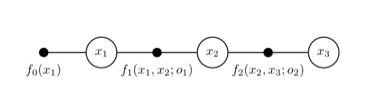

Initial Estimate: 
 (0.496673, 0.0498336, 0.2)
 (2.29466, -0.1299, -0.2)
 (4.08817, 0.304663, 0.1)

Optimized Pose 1, 2, 3: 
 (1.14851e-15, -1.08249e-15, -3.7202e-16)
 (2, -2.26656e-15, -5.18086e-16)
 (4, -3.52656e-15, -5.21041e-16)



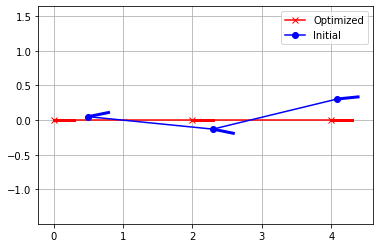

In [ ]:
"""
GTSAM Copyright 2010-2019, Georgia Tech Research Corporation,
Atlanta, Georgia 30332-0415
All Rights Reserved

See LICENSE for the license information

Odometry unit tests.
Author: Frank Dellaert & Duy Nguyen Ta (Python)
"""

# Create the graph (defined in pose2SLAM.h, derived from
# NonlinearFactorGraph)
graph = gtsam.NonlinearFactorGraph()

# Add a Gaussian prior on pose x_1
priorMean = gtsam.Pose2(0.0, 0.0, 0.0)  # prior mean is at origin
priorNoise = gtsam.noiseModel.Diagonal.Sigmas(
    np.array([0.3, 0.3, 0.1]))  # 30cm std on x,y, 0.1 rad on theta
# add directly to graph
graph.add(gtsam.PriorFactorPose2(1, priorMean, priorNoise))

# Add two odometry factors
# create a measurement for both factors (the same in this case)
odometry = gtsam.Pose2(2.0, 0.0, 0.0)
odometryNoise = gtsam.noiseModel.Diagonal.Sigmas(
    np.array([0.2, 0.2, 0.1]))  # 20cm std on x,y, 0.1 rad on theta
graph.add(gtsam.BetweenFactorPose2(1, 2, odometry, odometryNoise))
graph.add(gtsam.BetweenFactorPose2(2, 3, odometry, odometryNoise))

# Initialize to noisy points
pose_1_est = gtsam.Pose2([0.5, 0.0, 0.2])
pose_2_est = gtsam.Pose2([2.3, 0.1, -0.2])
pose_3_est = gtsam.Pose2([4.1, 0.1, 0.1])
print("Initial Estimate: \n", pose_1_est, pose_2_est, pose_3_est)

initialEstimate = gtsam.Values()
initialEstimate.insert(1, pose_1_est)
initialEstimate.insert(2, pose_2_est)
initialEstimate.insert(3, pose_3_est)

# Optimize using Levenberg-Marquardt optimization with an ordering from
# colamd
optimizer = gtsam.LevenbergMarquardtOptimizer(graph, initialEstimate)
result = optimizer.optimizeSafely()
marginals = gtsam.Marginals(graph, result)
marginals.marginalCovariance(1)

# Check first pose equality
pose_1 = result.atPose2(1)
pose_2 = result.atPose2(2)
pose_3 = result.atPose2(3)
print("Optimized Pose 1, 2, 3: \n", pose_1, pose_2, pose_3)

# Create a 3D plot for pose 1, 2, 3
pose_lst = [pose_1, pose_2, pose_3]
pose_est_lst = [pose_1_est, pose_2_est, pose_3_est]
plt.plot([pose.x() for pose in pose_lst], [pose.y() for pose in pose_lst], 'r-x')
plt.plot([pose.x() for pose in pose_est_lst], [pose.y() for pose in pose_est_lst], 'b-o')
plt.legend(['Optimized', 'Initial'])
for pose in pose_lst:
    plt.plot([pose.x(), pose.x() + 0.3 * np.cos(pose.theta())], [pose.y(), pose.y() + 0.3 * np.sin(pose.theta())], 'r-', linewidth=3)
    
for pose in pose_est_lst:
    plt.plot([pose.x(), pose.x() + 0.3 * np.cos(pose.theta())], [pose.y(), pose.y() + 0.3 * np.sin(pose.theta())], 'b-', linewidth=3)
plt.grid()
plt.axis('equal')
plt.show()

# Example 2: Odometry - Batch (Loop closure)

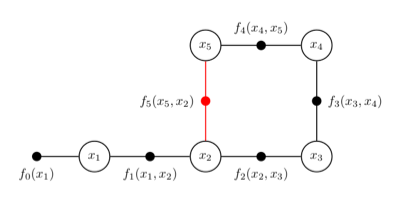

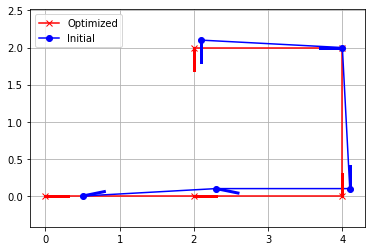

In [ ]:
"""
GTSAM Copyright 2010-2019, Georgia Tech Research Corporation,
Atlanta, Georgia 30332-0415
All Rights Reserved

See LICENSE for the license information

Pose2SLAM unit tests.
Author: Frank Dellaert & Duy Nguyen Ta (Python)
"""

# Assumptions
#  - All values are axis aligned
#  - Robot poses are facing along the X axis (horizontal, to the right in images)
#  - We have full odometry for measurements
#  - The robot is on a grid, moving 2 meters each step

# Create graph container and add factors to it
graph = gtsam.NonlinearFactorGraph()

# Add prior
# gaussian for prior
priorMean = gtsam.Pose2(0.0, 0.0, 0.0)  # prior at origin
priorNoise = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.3, 0.3, 0.1]))
# add directly to graph
graph.add(gtsam.PriorFactorPose2(1, priorMean, priorNoise))

# Add odometry
# general noisemodel for odometry
odometryNoise = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1]))
graph.add(gtsam.BetweenFactorPose2(
    1, 2, gtsam.Pose2(2.0, 0.0, 0.0), odometryNoise))
graph.add(gtsam.BetweenFactorPose2(
    2, 3, gtsam.Pose2(2.0, 0.0, pi / 2), odometryNoise))
graph.add(gtsam.BetweenFactorPose2(
    3, 4, gtsam.Pose2(2.0, 0.0, pi / 2), odometryNoise))
graph.add(gtsam.BetweenFactorPose2(
    4, 5, gtsam.Pose2(2.0, 0.0, pi / 2), odometryNoise))

### Loop closure
# graph.add(gtsam.BetweenFactorPose2(
#     2, 5, gtsam.Pose2(2.0, 2.0, 3*pi / 2), odometryNoise))

# Add pose constraint
model = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1]))
graph.add(gtsam.BetweenFactorPose2(5, 2, gtsam.Pose2(2.0, 0.0, pi / 2), model))

pose_1_est = gtsam.Pose2(0.5, 0.0, 0.2)
pose_2_est = gtsam.Pose2(2.3, 0.1, -0.2)
pose_3_est = gtsam.Pose2(4.1, 0.1, pi / 2)
pose_4_est = gtsam.Pose2(4.0, 2.0, pi)
pose_5_est = gtsam.Pose2(2.1, 2.1, -pi / 2)

# Initialize to noisy points
initialEstimate = gtsam.Values()
initialEstimate.insert(1, pose_1_est)
initialEstimate.insert(2, pose_2_est)
initialEstimate.insert(3, pose_3_est)
initialEstimate.insert(4, pose_4_est)
initialEstimate.insert(5, pose_5_est)

# Define optimizer
optimizer = gtsam.LevenbergMarquardtOptimizer(graph, initialEstimate)
result = optimizer.optimizeSafely()

# Plot Covariance Ellipses
marginals = gtsam.Marginals(graph, result)
P = marginals.marginalCovariance(1)

pose_1 = result.atPose2(1)
pose_2 = result.atPose2(2)
pose_3 = result.atPose2(3)
pose_4 = result.atPose2(4)
pose_5 = result.atPose2(5)

# Create a 3D plot for pose 1, 2, 3
pose_lst = [pose_1, pose_2, pose_3, pose_4, pose_5]
pose_est_lst = [pose_1_est, pose_2_est, pose_3_est, pose_4_est, pose_5_est]
plt.plot([pose.x() for pose in pose_lst], [pose.y() for pose in pose_lst], 'r-x')
plt.plot([pose.x() for pose in pose_est_lst], [pose.y() for pose in pose_est_lst], 'b-o')
plt.legend(['Optimized', 'Initial'])
for pose in pose_lst:
    plt.plot([pose.x(), pose.x() + 0.3 * np.cos(pose.theta())], [pose.y(), pose.y() + 0.3 * np.sin(pose.theta())], 'r-', linewidth=3)
    
for pose in pose_est_lst:
    plt.plot([pose.x(), pose.x() + 0.3 * np.cos(pose.theta())], [pose.y(), pose.y() + 0.3 * np.sin(pose.theta())], 'b-', linewidth=3)
plt.grid()
plt.axis('equal')
plt.show()


# Example 3: Odometry - Incremental (Loop closure)


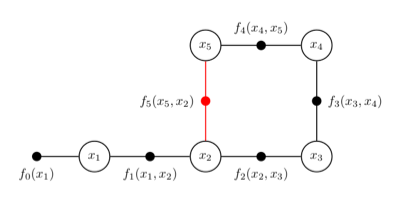

**************************************************
Inference after State 1:

Values with 2 values:
Value 1: (gtsam::Pose2)
(1.11022e-16, -1.38778e-17, 0)

Value 2: (gtsam::Pose2)
(2.07909, 0.00655571, 0.185101)




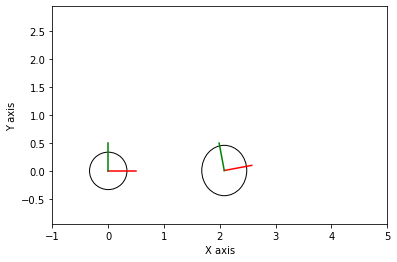

**************************************************
Inference after State 2:

Values with 3 values:
Value 1: (gtsam::Pose2)
(1.11022e-17, 1.11022e-18, -8.11015e-34)

Value 2: (gtsam::Pose2)
(2.03873, 0.00111867, 0.185101)

Value 3: (gtsam::Pose2)
(4.05364, 0.583324, 1.75609)




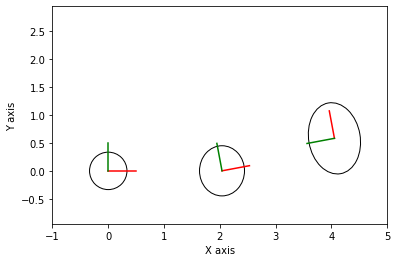

**************************************************
Inference after State 3:

Values with 4 values:
Value 1: (gtsam::Pose2)
(1.77636e-17, 2.77556e-18, 8.45483e-19)

Value 2: (gtsam::Pose2)
(2.03873, 0.00111867, 0.185101)

Value 3: (gtsam::Pose2)
(4.05364, 0.583324, 1.75609)

Value 4: (gtsam::Pose2)
(4.01321, 2.48525, -2.80795)




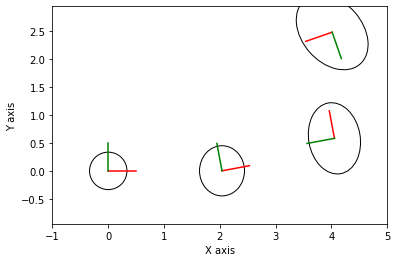

**************************************************
Inference after State 4:

Values with 5 values:
Value 1: (gtsam::Pose2)
(3.10862e-17, 3.60822e-18, 1.69097e-18)

Value 2: (gtsam::Pose2)
(2.03873, 0.00111867, 0.185101)

Value 3: (gtsam::Pose2)
(4.05364, 0.583324, 1.75609)

Value 4: (gtsam::Pose2)
(4.01321, 2.48525, -2.80795)

Value 5: (gtsam::Pose2)
(1.93111, 1.9873, -1.24914)




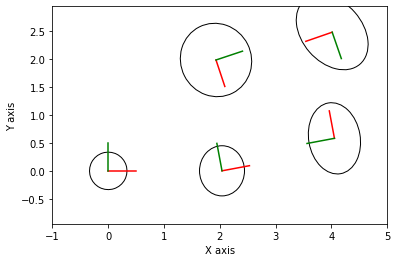

**************************************************
Inference after State 5:

Values with 5 values:
Value 1: (gtsam::Pose2)
(9.86137e-18, -6.68819e-17, -3.51721e-17)

Value 2: (gtsam::Pose2)
(2.03873, 0.00111867, 0.185101)

Value 3: (gtsam::Pose2)
(4.03624, 0.570593, 1.72186)

Value 4: (gtsam::Pose2)
(4.03751, 2.45831, -2.89646)

Value 5: (gtsam::Pose2)
(1.87653, 2.11919, -1.42586)




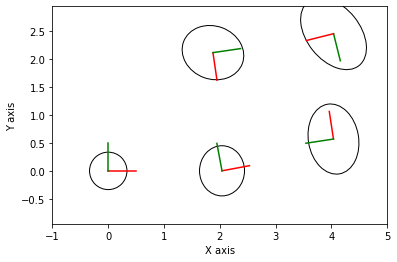

X1 covariance:
[[ 9.00000000e-02  2.15827356e-17  9.70667537e-18]
 [ 2.15827356e-17  9.00000000e-02 -2.92198988e-17]
 [ 9.70667537e-18 -2.92198988e-17  7.61543549e-03]]

X2 covariance:
[[0.1310659  0.00570987 0.00284909]
 [0.00570987 0.16058697 0.01526215]
 [0.00284909 0.01526215 0.01523087]]

X3 covariance:
[[3.20639073e-01 3.01043689e-03 4.82110453e-02]
 [3.01043689e-03 1.62132179e-01 2.42482431e-04]
 [4.82110453e-02 2.42482431e-04 2.04489480e-02]]

X4 covariance:
[[ 0.22476816 -0.09367098  0.03072292]
 [-0.09367098  0.38492779 -0.06180159]
 [ 0.03072292 -0.06180159  0.02150124]]

X5 covariance:
[[ 0.19716638  0.03027889 -0.01657553]
 [ 0.03027889  0.23598761 -0.03878983]
 [-0.01657553 -0.03878983  0.02018931]]



In [ ]:
"""
GTSAM Copyright 2010-2018, Georgia Tech Research Corporation,
Atlanta, Georgia 30332-0415
All Rights Reserved
Authors: Frank Dellaert, et al. (see THANKS for the full author list)

See LICENSE for the license information

Pose SLAM example using iSAM2 in the 2D plane.
Author: Jerred Chen, Yusuf Ali
Modeled after:
    - VisualISAM2Example by: Duy-Nguyen Ta (C++), Frank Dellaert (Python)
    - Pose2SLAMExample by: Alex Cunningham (C++), Kevin Deng & Frank Dellaert (Python)
"""

def report_on_progress(graph: gtsam.NonlinearFactorGraph, current_estimate: gtsam.Values,
                        key: int):
    """Print and plot incremental progress of the robot for 2D Pose SLAM using iSAM2."""

    # Print the current estimates computed using iSAM2.
    print("*"*50 + f"\nInference after State {key+1}:\n")
    print(current_estimate)

    # Compute the marginals for all states in the graph.
    marginals = gtsam.Marginals(graph, current_estimate)

    # Plot the newly updated iSAM2 inference.
    fig = plt.figure(0)
    axes = fig.gca()
    plt.cla()

    i = 1
    while current_estimate.exists(i):
        gtsam_plot.plot_pose2(0, current_estimate.atPose2(i), 0.5, marginals.marginalCovariance(i))
        i += 1

    plt.axis('equal')
    axes.set_xlim(-1, 5)
    axes.set_ylim(-1, 3)
    figfolder = "fig"
    if not os.path.exists(figfolder):
        os.makedirs(figfolder)
    plt.savefig(figfolder + f"/state_{key+1}.png")    
    plt.pause(1)

def determine_loop_closure(odom: np.ndarray, current_estimate: gtsam.Values,
    key: int, xy_tol=0.6, theta_tol=17) -> int:
    """Simple brute force approach which iterates through previous states
    and checks for loop closure.

    Args:
        odom: Vector representing noisy odometry (x, y, theta) measurement in the body frame.
        current_estimate: The current estimates computed by iSAM2.
        key: Key corresponding to the current state estimate of the robot.
        xy_tol: Optional argument for the x-y measurement tolerance, in meters.
        theta_tol: Optional argument for the theta measurement tolerance, in degrees.
    Returns:
        k: The key of the state which is helping add the loop closure constraint.
            If loop closure is not found, then None is returned.
    """
    if current_estimate:
        prev_est = current_estimate.atPose2(key+1)
        rotated_odom = prev_est.rotation().matrix() @ odom[:2]
        curr_xy = np.array([prev_est.x() + rotated_odom[0],
                            prev_est.y() + rotated_odom[1]])
        curr_theta = prev_est.theta() + odom[2]
        for k in range(1, key+1):
            pose_xy = np.array([current_estimate.atPose2(k).x(),
                                current_estimate.atPose2(k).y()])
            pose_theta = current_estimate.atPose2(k).theta()
            if (abs(pose_xy - curr_xy) <= xy_tol).all() and \
                (abs(pose_theta - curr_theta) <= theta_tol*np.pi/180):
                    return k

plt.ion()

# Declare the 2D translational standard deviations of the prior factor's Gaussian model, in meters.
prior_xy_sigma = 0.3

# Declare the 2D rotational standard deviation of the prior factor's Gaussian model, in degrees.
prior_theta_sigma = 5

# Declare the 2D translational standard deviations of the odometry factor's Gaussian model, in meters.
odometry_xy_sigma = 0.2

# Declare the 2D rotational standard deviation of the odometry factor's Gaussian model, in degrees.
odometry_theta_sigma = 5

# Although this example only uses linear measurements and Gaussian noise models, it is important
# to note that iSAM2 can be utilized to its full potential during nonlinear optimization. This example
# simply showcases how iSAM2 may be applied to a Pose2 SLAM problem.
PRIOR_NOISE = gtsam.noiseModel.Diagonal.Sigmas(np.array([prior_xy_sigma,
                                                        prior_xy_sigma,
                                                        prior_theta_sigma*np.pi/180]))
ODOMETRY_NOISE = gtsam.noiseModel.Diagonal.Sigmas(np.array([odometry_xy_sigma,
                                                            odometry_xy_sigma,
                                                            odometry_theta_sigma*np.pi/180]))

# Create a Nonlinear factor graph as well as the data structure to hold state estimates.
graph = gtsam.NonlinearFactorGraph()
initial_estimate = gtsam.Values()

# Create iSAM2 parameters which can adjust the threshold necessary to force relinearization and how many
# update calls are required to perform the relinearization.
parameters = gtsam.ISAM2Params()
parameters.setRelinearizeThreshold(0.1)
parameters.setRelinearizeSkip(1) # for newer version of gtsam
# parameters.relinearizeSkip = 1 # for older version of gtsam
isam = gtsam.ISAM2(parameters)

# Create the ground truth odometry measurements of the robot during the trajectory.
true_odometry = [(2, 0, 0),
                (2, 0, math.pi/2),
                (2, 0, math.pi/2),
                (2, 0, math.pi/2),
                (2, 0, math.pi/2)]

# Corrupt the odometry measurements with gaussian noise to create noisy odometry measurements.
odometry_measurements = [np.random.multivariate_normal(true_odom, ODOMETRY_NOISE.covariance())
                            for true_odom in true_odometry]

# Add the prior factor to the factor graph, and poorly initialize the prior pose to demonstrate
# iSAM2 incremental optimization.
graph.push_back(gtsam.PriorFactorPose2(1, gtsam.Pose2(0, 0, 0), PRIOR_NOISE))
initial_estimate.insert(1, gtsam.Pose2(0.5, 0.0, 0.2))

# Initialize the current estimate which is used during the incremental inference loop.
current_estimate = initial_estimate

# for plotting
frames = []
for i in range(len(true_odometry)):

    # Obtain the noisy odometry that is received by the robot and corrupted by gaussian noise.
    noisy_odom_x, noisy_odom_y, noisy_odom_theta = odometry_measurements[i]

    # Determine if there is loop closure based on the odometry measurement and the previous estimate of the state.
    loop = determine_loop_closure(odometry_measurements[i], current_estimate, i, xy_tol=0.8, theta_tol=25)

    # Add a binary factor in between two existing states if loop closure is detected.
    # Otherwise, add a binary factor between a newly observed state and the previous state.
    if loop:
        graph.push_back(gtsam.BetweenFactorPose2(i + 1, loop, 
            gtsam.Pose2(noisy_odom_x, noisy_odom_y, noisy_odom_theta), ODOMETRY_NOISE))
    else:
        graph.push_back(gtsam.BetweenFactorPose2(i + 1, i + 2, 
            gtsam.Pose2(noisy_odom_x, noisy_odom_y, noisy_odom_theta), ODOMETRY_NOISE))

        # Compute and insert the initialization estimate for the current pose using the noisy odometry measurement.
        computed_estimate = current_estimate.atPose2(i + 1).compose(gtsam.Pose2(noisy_odom_x,
                                                                                noisy_odom_y,
                                                                                noisy_odom_theta))
        initial_estimate.insert(i + 2, computed_estimate)

    # Perform incremental update to iSAM2's internal Bayes tree, optimizing only the affected variables.
    isam.update(graph, initial_estimate)
    current_estimate = isam.calculateEstimate()

    # Report all current state estimates from the iSAM2 optimzation.
    report_on_progress(graph, current_estimate, i)
    frames.append(imageio.imread(f"fig/state_{i+1}.png"))
    initial_estimate.clear()

imageio.mimsave('animation.gif', frames, fps=1)

# Print the final covariance matrix for each pose after completing inference on the trajectory.
marginals = gtsam.Marginals(graph, current_estimate)
i = 1
for i in range(1, len(true_odometry)+1):
    print(f"X{i} covariance:\n{marginals.marginalCovariance(i)}\n")

plt.ioff()
plt.show()

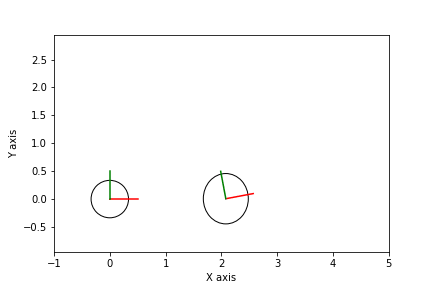

In [ ]:
# Show Animation
Image(filename='animation.gif')